In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('data/test_task5 - test_task5.csv', error_bad_lines=False, thousands=',')

In [51]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')

In [36]:
df['Application price'] = [float(x[1:]) for x in df['Application price']]
df['Marketing spend'] = [float(x[1:]) for x in df['Marketing spend']]
df['Cost per install'] = [float(x[1:]) for x in df['Cost per install']]

In [52]:
df['Application price'] = [float(x[1:]) for x in df['Application price']]
df['Marketing spend'] = [float(str(x[1:]).replace(',', '')) for x in df['Marketing spend']]
df['Cost per install'] = [float(x[1:]) for x in df['Cost per install']]

df.rename(index=str, inplace=True, columns={'Application price' : 'Application price($)',
                                            'Marketing spend' : 'Marketing spend($)',
                                            'Cost per install' : 'Cost per install($)'})

In [145]:
df[df.Date > '2016-04-20']

,Date,Day,Application price($),Total app installs (marketing+organic from store),Impressions,Clicks,Marketing spend($),Installs from Marketing campaigns,Cost per install($),revenue,profit
76,2016-04-21,Thu,9.99,349,246163,5834,756.79,200,3.78,3486.51,2729.72
77,2016-04-22,Fri,9.99,313,290409,7069,779.69,214,3.64,3126.87,2347.18
78,2016-04-23,Sat,9.99,345,344045,8116,943.65,201,4.69,3446.55,2502.90
79,2016-04-24,Sun,9.99,361,303446,7383,944.25,241,3.92,3606.39,2662.14
80,2016-04-25,Mon,9.99,345,303618,6987,840.25,201,4.18,3446.55,2606.30
81,2016-04-26,Tue,9.99,304,355293,6886,920.11,208,4.42,3036.96,2116.85
82,2016-04-27,Wed,9.99,328,302391,6171,910.12,192,4.74,3276.72,2366.60
83,2016-04-28,Thu,9.99,301,256158,5591,751.11,152,4.94,3006.99,2255.88
84,2016-04-29,Fri,9.99,297,206030,5169,638.94,173,3.69,2967.03,2328.09
85,2016-04-30,Sat,9.99,327,285256,6875,752.51,207,3.64,3266.73,2514.22


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 0 to 134
Data columns (total 11 columns):
Date                                                 135 non-null datetime64[ns]
Day                                                  135 non-null object
Application price($)                                 135 non-null float64
Total app installs (marketing+organic from store)    135 non-null int64
Impressions                                          135 non-null int64
Clicks                                               135 non-null int64
Marketing spend($)                                   135 non-null float64
Installs from Marketing campaigns                    135 non-null int64
Cost per install($)                                  135 non-null float64
revenue                                              135 non-null float64
profit                                               135 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(1)
memory usage: 17.7+ KB


In [72]:
df['revenue'] = df['Total app installs (marketing+organic from store)'] * df['Application price($)']
df['profit'] = df['Total app installs (marketing+organic from store)'] * df['Application price($)'] - df['Marketing spend($)']

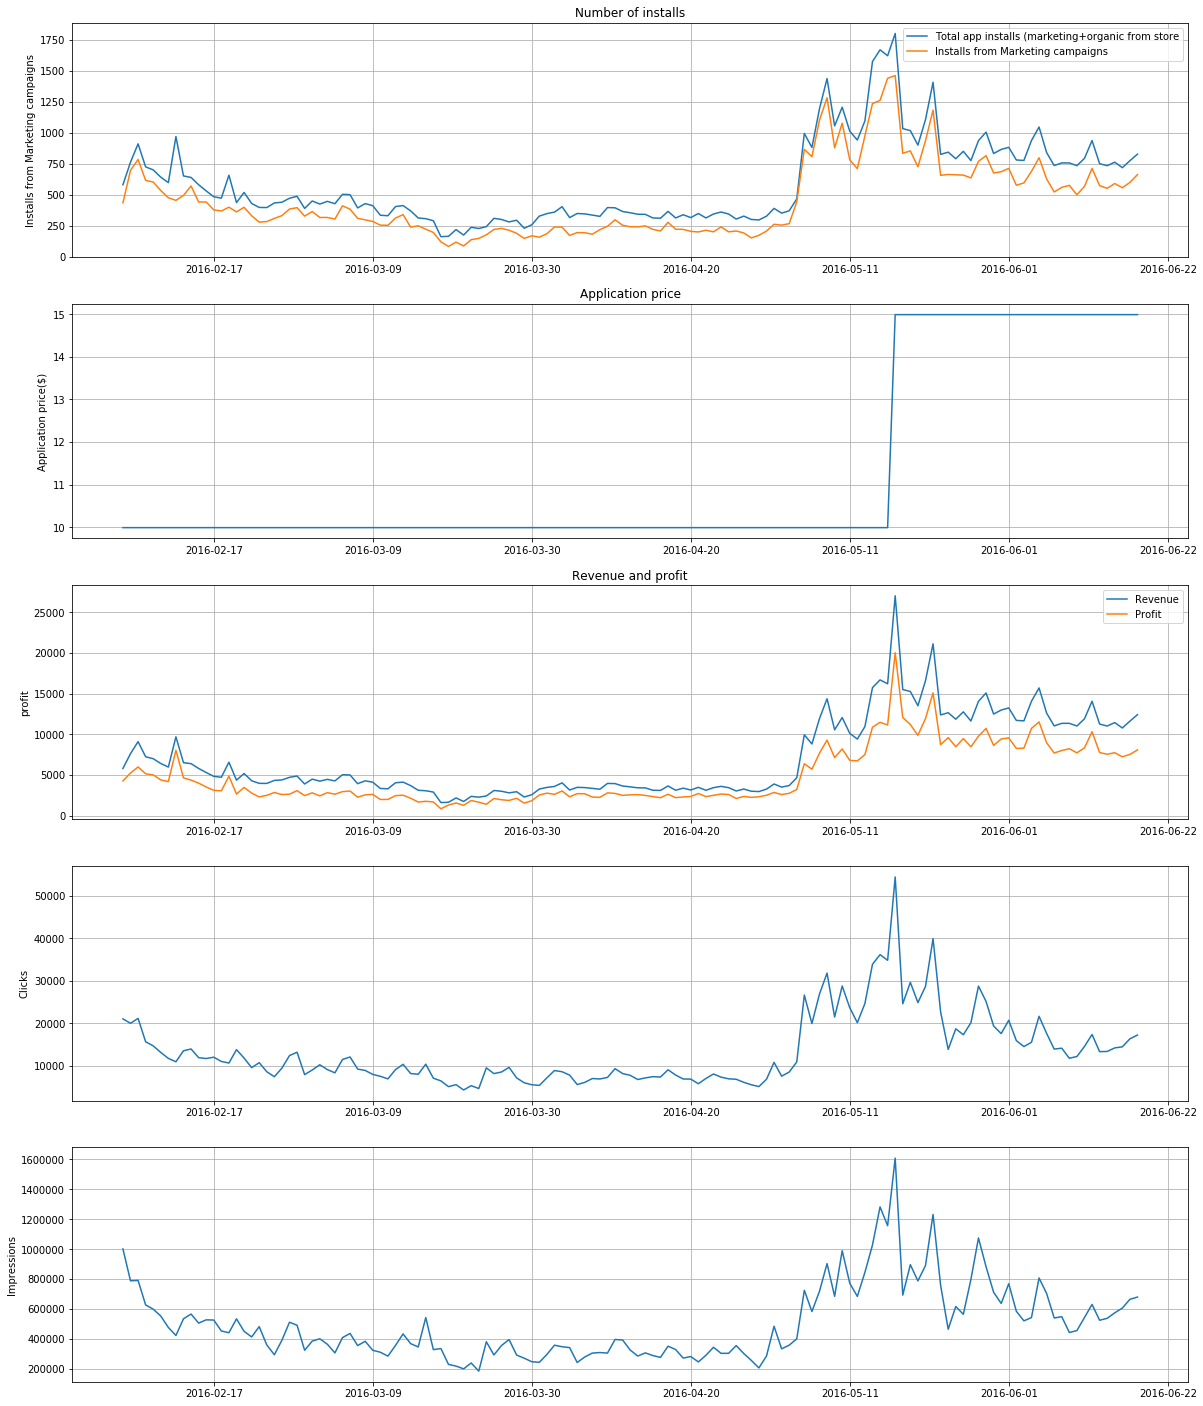

In [144]:
fig, ax = plt.subplots(5,1,figsize=[20,25])

ax1 = sns.lineplot(x='Date', y='Total app installs (marketing+organic from store)', data=df, ax=ax[0]);
ax1 = sns.lineplot(x='Date', y='Installs from Marketing campaigns', data=df, ax=ax[0]);
ax1.legend(['Total app installs (marketing+organic from store', 'Installs from Marketing campaigns'])
ax1.grid('true')
ax1.set_xlabel('')
ax1.set_title('Number of installs')
ax1.figure.savefig('ax1.png')


ax2 = sns.lineplot(x='Date', y='Application price($)', data=df, ax=ax[1]);
ax2.grid('true')
ax2.set_xlabel('')
ax2.set_title('Application price')
ax2.figure.savefig('ax2.png')


ax3 = sns.lineplot(x='Date', y='revenue', data=df, ax=ax[2]);
ax3 = sns.lineplot(x='Date', y='profit', data=df, ax=ax[2]);
ax3.legend(['Revenue', 'Profit']);
ax3.grid('true')
ax3.set_xlabel('')
ax3.set_title('Revenue and profit')
ax3.figure.savefig('ax3.png')

ax4 = sns.lineplot(x='Date', y='Clicks', data=df, ax=ax[3]);
ax4.grid('true')
ax4.set_xlabel('')
ax4.figure.savefig('ax4.png')

ax5 = sns.lineplot(x='Date', y='Impressions', data=df, ax=ax[4]);
ax5.grid('true')
ax5.set_xlabel('');
ax5.figure.savefig('ax5.png');

In [174]:
(df[df.Date.dt.month == 2]['revenue'].sum(),
df[df.Date.dt.month == 3]['revenue'].sum(),
df[df.Date.dt.month == 4]['revenue'].sum(),
df[df.Date.dt.month == 5]['revenue'].sum(),
df[df.Date.dt.month == 6]['revenue'].sum())

(143006.85,
 101778.12,
 101997.90000000002,
 387372.31000000006,
 218179.44999999998)

In [179]:
df.groupby(df.Date.dt.month)['profit'].sum()

Date
2     97264.80
3     64435.77
4     74937.72
5    273828.67
6    153550.15
Name: profit, dtype: float64

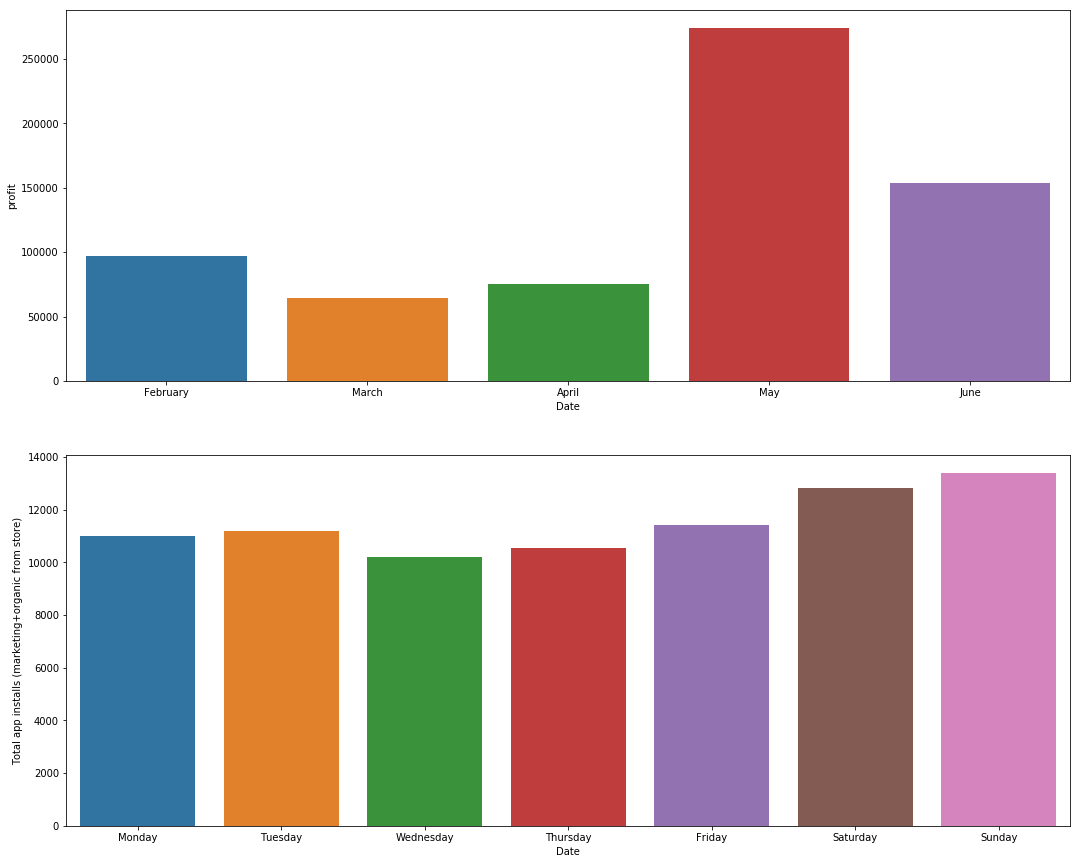

In [136]:
fig, ax = plt.subplots(2, 1, figsize=[18,15] )
ax0 = sns.barplot(x=df.Date.dt.month, y='profit', data=df, ax=ax[0], estimator=sum, ci=None);
ax0.set_xticklabels(['February', 'March', 'April', 'May', 'June'])
ax0.set

ax1 = sns.barplot(x=df.Date.dt.dayofweek, y='Total app installs (marketing+organic from store)',
                  data=df, ax=ax[1], estimator=np.sum, ci=None);
ax1.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

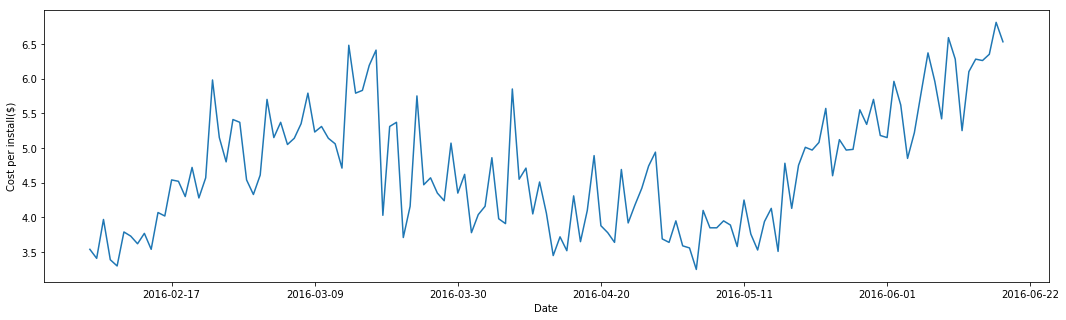

In [165]:
fig, ax = plt.subplots(figsize=[18,5] )
ax0 = sns.lineplot(x='Date', y='Cost per install($)', data=df, ax=ax);
ax0.figure.savefig('cost.png')